In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Install cohere

In [4]:
!pip install cohere -q

In [5]:
import cohere
import numpy as np
import seaborn as sns
import altair as alt
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
# Paste your API key here. Remember to not share publicly
co = cohere.Client("API_KEY") 

In [7]:
texts = ["I like to be in my house", 
         "I enjoy staying home", 
         "the isotope 238u decays to 206pb"]

In [8]:
response = co.embed(
    texts=texts,
    model='embed-english-v3.0',
    input_type='search_document'
)

In [9]:
embeddings = response.embeddings

[sentence1, sentence2, sentence3] = embeddings

print("Embedding for sentence 1", np.array(sentence1))
print("Embedding for sentence 2", np.array(sentence2))
print("Embedding for sentence 3", np.array(sentence3))

Embedding for sentence 1 [ 0.04977417  0.03808594 -0.029953   ... -0.07397461 -0.00809479
 -0.0184021 ]
Embedding for sentence 2 [ 0.0430603   0.05407715 -0.02485657 ... -0.06161499 -0.01942444
 -0.01004791]
Embedding for sentence 3 [ 0.02392578  0.00740051 -0.04693604 ... -0.04046631 -0.0236969
  0.01959229]


Note that the embeddings are vectors (lists) of 1024 numbers, so they are truncated here (thus the dots in between). One would expect that the vectors corresponding to sentences 1 and 2 are similar to each other and that both are different from the vector corresponding to sentence 3. However, from inspection, this is not very clear. We need to calculate some similarities to see if this is the case. We will do that in the following two sections.

In [10]:
print("Similarity between sentences 1 and 2:", np.dot(sentence1, sentence2))
print("Similarity between sentences 1 and 3:", np.dot(sentence1, sentence3))
print("Similarity between sentences 2 and 3:", np.dot(sentence2, sentence3))

Similarity between sentences 1 and 2: 0.8193240705933598
Similarity between sentences 1 and 3: 0.19578180523850217
Similarity between sentences 2 and 3: 0.19809195189307527


Cosine Similarity- 
Cosine similarity is often preferred over dot product for calculating the similarity between embeddings primarily because it normalizes for magnitude, focusing solely on the orientation of the vectors in space rather than their length. This characteristic makes cosine similarity particularly useful in various applications, especially in natural language processing and information retrieval. Here are some key reasons for this preference:

Magnitude Independence: Cosine similarity measures the cosine of the angle between two vectors, making it independent of their magnitudes. This is particularly useful when the magnitudes of the vectors don't carry meaningful information for the similarity measure. For example, in text analysis, longer documents might naturally have higher word counts, but that doesn't necessarily make them more related to other documents.

Normalization: Since cosine similarity considers the direction of vectors rather than their magnitude, it effectively normalizes the vectors, treating them as if they all have unit length. This normalization allows for fair comparison between vectors of different lengths.

Robustness in High-Dimensional Spaces: In high-dimensional spaces, such as those common in text and other semantic embeddings, the Euclidean distance (which the dot product can relate to) can become less meaningful due to the curse of dimensionality. Cosine similarity, by focusing on the angle between vectors, often remains more meaningful in these spaces.

Intuitive Interpretation for Similarity: Cosine similarity ranges from -1 to 1, where 1 means vectors are identical, 0 means they are orthogonal (independent), and -1 means they are diametrically opposed. This range provides an intuitive interpretation of similarity that is easy to understand and apply, especially in comparing document or word embeddings where angle plays a crucial role in defining context and semantic similarity.

Applicability to Sparse Vectors: In many applications, such as text documents represented as TF-IDF vectors, the data can be very sparse. Cosine similarity is particularly effective for sparse vectors because it inherently considers only the non-zero dimensions in its computation, making it computationally efficient and meaningful in capturing the similarity based on the common attributes (non-zero elements) of the vectors.

While cosine similarity has these advantages, it's also important to note that the choice between cosine similarity and dot product (or other similarity measures) should be based on the specific requirements and characteristics of the application at hand. In some cases, the magnitude of vectors carries important information, and in such scenarios, measures that consider magnitude might be more appropriate.

In [11]:
print("Cosine similarity between sentences 1 and 2:", cosine_similarity([sentence1], [sentence2])[0][0])
print("Cosine similarity between sentences 1 and 3:", cosine_similarity([sentence1], [sentence3])[0][0])
print("Cosine similarity between sentences 2 and 3:", cosine_similarity([sentence2], [sentence3])[0][0])

Cosine similarity between sentences 1 and 2: 0.8194230447715474
Cosine similarity between sentences 1 and 3: 0.1957269731414732
Cosine similarity between sentences 2 and 3: 0.19816386166987385


[Text(0.5, 0, 'I like to be in my house'),
 Text(1.5, 0, 'I enjoy staying home'),
 Text(2.5, 0, 'the isotope 238u decays to 206pb')]

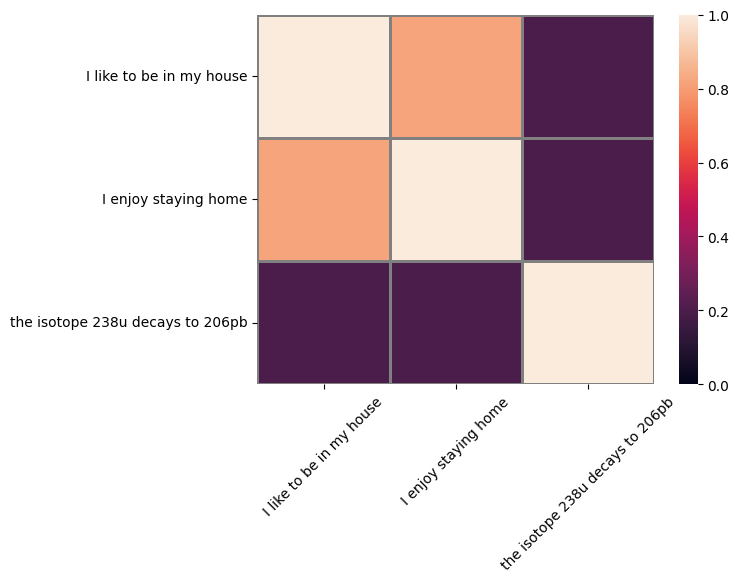

In [12]:
# Get pairwise dot product similarities
dot_product_similarities = [[cosine_similarity([embeddings[i]], [embeddings[j]])[0][0] for i in range(len(embeddings))] for j in range(len(embeddings))]

# Plot in 3x3 grid
ax = sns.heatmap(dot_product_similarities, vmin=0, vmax=1,
                 linewidths=1, linecolor='grey',
                 xticklabels=texts,
                 yticklabels=texts,
)
ax.set_xticklabels(labels=texts, rotation=45)

Notice that the dot product and cosine distance give nearly identical values. The reason for this is that the embedding is normalized (meaning each vector has norm equal to 1). When the embedding is not normalized, the dot product and cosine distance would give different values.